# 1. Análise Exploratória de Dados

O notebook tem o objetivo de entender, categorizar e selecionar as variáveis que serão utilizadas na clusterização.

In [1]:
# Importando os pacotes necessários para o Notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando a Base de Dados
df_municipios = pd.read_csv('../data/processed/base_unificada.csv', 
                        decimal = ".", 
                        sep = ";")
df_municipios.head()

,Código,Município,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000",...,"População de 25 anos ou mais de idade, 1991","População de 25 anos ou mais de idade, 2000","População de 65 anos ou mais de idade, 1991","População de 65 anos ou mais de idade, 2000","População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000",QTD_TOTAL_CNPJ,QTD_TOTAL_CNPJ_SUPERMERCADO
0,520005,Abadia de Goiás (GO),136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,...,1872,2433,121,227,4227,4971,3096,1875,2216.0,22.0
1,310010,Abadia dos Dourados (MG),897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,...,3308,3781,354,459,6492,6446,3927,2519,1131.0,23.0
2,520010,Abadiânia (GO),1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,...,4241,5918,446,686,9402,11452,7206,4246,2550.0,36.0
3,150010,Abaetetuba (PA),1613.9,73.8,51.184552,70.77,25.61,3.15,24.85,102.14,...,33554,44897,3792,4688,99989,119152,70843,48309,10264.0,254.0
4,310020,Abaeté (MG),1822.4,12.3,172.311549,72.50,21.59,2.41,15.56,253.68,...,10163,12406,1084,1595,20689,22360,19022,3338,5588.0,62.0


In [3]:
df_municipios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5272 entries, 0 to 5271
Data columns (total 27 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Código                                                                 5272 non-null   int64  
 1   Município                                                              5272 non-null   object 
 2   Área (km²)                                                             5272 non-null   float64
 3   Densidade demográfica, 2000                                            5272 non-null   float64
 4   Distância à capital (km)                                               5272 non-null   float64
 5   Esperança de vida ao nascer, 2000                                      5272 non-null   float64
 6   Mortalidade até um ano de idade, 2000                                  5272 non-null   f

## 2. Descrição da Base

A base de municípios tem 5.272 registros, com 25 variáveis. As bases estão separados em: 
 1. **Código**: lista dos municípios brasileiros associados a um código composto de 7 dígitos, sendo os dois primeiros referentes ao código da Unidade da Federação. Fonte: [IBGE.](https://www.ibge.gov.br/explica/codigos-dos-municipios.php)                                                                    
 2. **Município**: nome do munícipio.                                                               
 3. **Área (km²)**: área do municípo em em km2.                                                             
 4. **Densidade demográfica, 2000**: distribuição espacial dos habitantes por quilômetro quadrado e os principais sistemas de transporte. Fonte: [IBGE.](https://www.ibge.gov.br/geociencias/cartas-e-mapas/sociedade-e-economia/15955-densidade-demografica.html?=&t=sobre)                                            
 5. **Distância à capital (km)**: distâncias médias (km) de deslocamento em linha reta com destino a capitais.                                              
 6. **Esperança de vida ao nascer, 2000**: Número médio de anos de vida esperados para um recém-nascido, mantido o padrão de mortalidade existente, em determinado espaço geográfico, no ano considerado. O aumento da esperança de vida ao nascer indica melhoria das condições de vida e saúde da população. Fonte: [Datasus](http://tabnet.datasus.gov.br/cgi/idb2000/fqa10.htm)                                  
 7. **Mortalidade até um ano de idade, 2000**: Distribuição percentual dos óbitos de crianças menores de um ano de idade. Fonte: [Datasus](http://tabnet.datasus.gov.br/tabdata/livroidb/2edrev/a09.pdf)                                
 8. **Taxa de fecundidade total, 2000**: Número médio de filhos nascidos vivos, tidos por uma mulher ao final do seu período reprodutivo, na população residente em determinado espaço geográfico, no ano considerado. Fonte: [Datasus](http://tabnet.datasus.gov.br/tabdata/LivroIDB/2edrev/a05.pdf)
 
 9. **Percentual de pessoas de 25 anos ou mais analfabetas, 2000**: número de pessoas de 25 anos ou mais analfabetas.
 
 10. **Renda per Capita, 2000**: A renda per capita é obtida mediante a divisão da Renda Nacional (isto é, Produto Nacional Bruto menos os gastos de depreciação do capital e os impostos diretos) pelo número de habitantes do país. Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Renda_per_capita)
 
 11. **Índice de Gini, 2000**: O Índice de Gini é um instrumento para medir o grau de concentração de renda em determinado grupo. Ele aponta a diferença entre os rendimentos dos mais pobres e dos mais ricos. Numericamente, varia de zero a um (alguns apresentam de zero a cem). O valor zero representa a situação de igualdade, ou seja, todos têm a mesma renda. O valor um (ou cem) está no extremo oposto, isto é, uma só pessoa detém toda a riqueza. Na prática, o Índice de Gini costuma comparar os 20% mais pobres com os 20% mais ricos. Fonte: [IPEA](https://www.ipea.gov.br/desafios/index.php?option=com_content&id=2048:catid=28)                                            
 12. **Intensidade da indigência, 2000**: percentual das penssoas consideradas como indigêntes aqueles cuja renda familiar per capita é inferior ao valor necessário para atender tão-somente às necessidades básicas de alimentação. Fonte: [Scielo - Pobreza e indigência no Brasil: algumas evidências empíricas com base na PNAD 2004](https://www.scielo.br/j/neco/a/cGB8zkHj9KqK7nRdVMbB5Pt/?lang=pt)
 
 13. **Intensidade da pobreza, 2000**: percentual das pessoas definidos como pobres os indivíduos cuja renda familiar per capita é inferior ao valor que corresponderia ao necessário para atender a todas as necessidades básicas (alimentação, habitação, transporte, saúde, lazer, educação, etc.). Fonte: [Scielo - Pobreza e indigência no Brasil: algumas evidências empíricas com base na PNAD 2004](https://www.scielo.br/j/neco/a/cGB8zkHj9KqK7nRdVMbB5Pt/?lang=pt)                                          
 14. **Índice de Desenvolvimento Humano Municipal, 2000**: O Índice de Desenvolvimento Humano (IDH) é uma medida resumida do progresso a longo prazo em três dimensões básicas do desenvolvimento humano: renda, educação e saúde. O IDH pretende ser uma medida geral e sintética que, apesar de ampliar a perspectiva sobre o desenvolvimento humano, não abrange nem esgota todos os aspectos de desenvolvimento. Fonte: [PNUD](https://www.br.undp.org/content/brazil/pt/home/idh0.html)                       
 15. **Taxa bruta de freqüência à escola, 2000**: A Taxa de Escolarização Bruta é a razão entre o número total de matrículas (independente da faixa etária) e a população correspondente na faixa etária prevista (15 a 17 anos) para o curso na etapa de ensino. Fonte: [Observatório da Criança e do Adolescente](https://observatoriocrianca.org.br/cenario-infancia/temas/ensino-medio/565-taxa-de-escolarizacao-bruta-e-liquida-no-ensino-medio?filters=1,134)                                 
 16. **Taxa de alfabetização, 2000**: percentual de pessoas maiores de 15 anos que sabem ler e escrever. Fonte [Wikipedia](https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_%C3%ADndice_de_alfabetiza%C3%A7%C3%A3o)
 
 17. **Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000**  
 18. **População de 25 anos ou mais de idade, 1991**                              
 19. **População de 25 anos ou mais de idade, 2000**                              
 20. **População de 65 anos ou mais de idade, 1991**                              
 21. **População de 65 anos ou mais de idade, 2000**                              
 22. **População total, 1991**                                                    
 23. **População total, 2000**                                                    
 24. **População urbana, 2000**                                                   
 25. **População rural, 2000**
 
 26. **Qtd Total CNPJ**: quantidade de total de CNPJs extraídos da Receita Federal do Brasil.
 
 27. **QTD_TOTAL_CNPJ_SUPERMERCADO**: quantidade de total de CNPJs do CNAE 4711301 e 471102, referente aos supermercados disponibilidade pela Receita Federal do Brasil.

In [4]:
df_municipios.describe()

,Código,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000","Índice de Gini, 2000",...,"População de 25 anos ou mais de idade, 1991","População de 25 anos ou mais de idade, 2000","População de 65 anos ou mais de idade, 1991","População de 65 anos ou mais de idade, 2000","População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000",QTD_TOTAL_CNPJ,QTD_TOTAL_CNPJ_SUPERMERCADO
count,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,...,5.272000e+03,5.272000e+03,5272.000000,5272.000000,5.272000e+03,5.272000e+03,5.272000e+03,5272.000000,5.272000e+03,5272.000000
mean,325368.944423,1592.568797,99.838373,252.820121,67.857360,33.680269,2.857623,26.270182,173.026745,0.561220,...,1.263128e+04,1.605551e+04,1328.143209,1863.750190,2.755399e+04,3.188662e+04,2.600461e+04,5882.007777,7.632983e+03,84.588961
std,98228.203061,5857.896646,535.300271,163.991027,4.791446,18.213236,0.742177,14.934185,96.542284,0.058643,...,9.117759e+04,1.061539e+05,9492.753370,12857.586041,1.726599e+05,1.907841e+05,1.839113e+05,10632.877458,6.071558e+04,428.928369
min,110001.000000,2.900000,0.100000,0.000000,54.350000,5.380000,1.560000,2.020000,28.380000,0.360000,...,2.390000e+02,4.220000e+02,17.000000,27.000000,6.180000e+02,7.950000e+02,0.000000e+00,0.000000,1.870000e+02,1.000000
25%,251447.500000,209.650000,11.500000,121.103591,64.700000,18.590000,2.320000,13.830000,88.727500,0.520000,...,2.219750e+03,2.628750e+03,252.000000,344.000000,5.120500e+03,5.378000e+03,2.595000e+03,1861.000000,8.400000e+02,9.000000
50%,314645.000000,422.700000,23.900000,227.883543,68.350000,29.185000,2.660000,22.160000,162.090000,0.560000,...,4.232500e+03,5.149500e+03,507.500000,675.000000,1.017300e+04,1.089100e+04,5.610000e+03,3737.500000,1.633000e+03,25.000000
75%,411727.500000,1063.475000,48.900000,358.032483,71.460000,45.402500,3.220000,39.170000,234.610000,0.600000,...,8.333000e+03,1.039175e+04,1020.000000,1365.500000,1.957625e+04,2.222125e+04,1.365675e+04,7345.000000,3.949750e+03,63.000000
max,530010.000000,161445.900000,12881.400000,1474.314590,78.180000,109.670000,7.790000,70.130000,954.650000,0.820000,...,5.106165e+06,5.825893e+06,499880.000000,670780.000000,9.649519e+06,1.043425e+07,9.813187e+06,621065.000000,3.602821e+06,22185.000000


Percebe-se, atraves das medias e do desvio padrão, que a escala dos dados é bem diferentes, os dados precisam de normalização.

In [5]:
# normalização
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# np_df = min_max_scaler.fit_transform(df_municipios.drop(columns = ['Código', 'Município']))
# np_df = pd.DataFrame(np_df, columns = df_municipios.drop(columns = ['Código', 'Município']).columns)

In [6]:
df_municipios['População total, 2000'].max()

10434252

## 3. Variáveis de População
Visto que a base possui 7 variavéis de população será mantido:
- População Total, 2000
- Variação População 1991 a 2000
- Percentual População de 65 anos ou mais de idade, 2000
- Percentual População Urbana

In [7]:
# Criando Variáveis
df_municipios['Variacao_Populacao_1991_a_2000'] = df_municipios['População total, 2000'] / df_municipios['População total, 1991'] - 1 
df_municipios['Percentual_Populacao_65_anos'] = df_municipios['População de 65 anos ou mais de idade, 2000'] / df_municipios['População total, 2000']
df_municipios['Percentual_Populacao_Urbana'] = df_municipios['População urbana, 2000'] / df_municipios['População total, 2000']

In [8]:
# Removendo Demais Variáveis
df_municipios.drop(columns=['População de 65 anos ou mais de idade, 2000', \
                            'População de 65 anos ou mais de idade, 1991', \
                           'População de 25 anos ou mais de idade, 1991', \
                           'População de 25 anos ou mais de idade, 2000', \
                           'População total, 1991', \
                           'População rural, 2000', \
                           'População urbana, 2000'], inplace = True)
df_municipios.head()

,Código,Município,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000",...,"Índice de Desenvolvimento Humano Municipal, 2000","Taxa bruta de freqüência à escola, 2000","Taxa de alfabetização, 2000","Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000","População total, 2000",QTD_TOTAL_CNPJ,QTD_TOTAL_CNPJ_SUPERMERCADO,Variacao_Populacao_1991_a_2000,Percentual_Populacao_65_anos,Percentual_Populacao_Urbana
0,520005,Abadia de Goiás (GO),136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,...,0.742,80.17,88.03,4.87,4971,2216.0,22.0,0.176011,0.045665,0.622812
1,310010,Abadia dos Dourados (MG),897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,...,0.760,74.57,86.58,4.36,6446,1131.0,23.0,-0.007086,0.071207,0.609215
2,520010,Abadiânia (GO),1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,...,0.723,74.18,82.45,4.24,11452,2550.0,36.0,0.218039,0.059902,0.629235
3,150010,Abaetetuba (PA),1613.9,73.8,51.184552,70.77,25.61,3.15,24.85,102.14,...,0.706,81.76,80.74,4.28,119152,10264.0,254.0,0.191651,0.039345,0.594560
4,310020,Abaeté (MG),1822.4,12.3,172.311549,72.50,21.59,2.41,15.56,253.68,...,0.778,78.39,87.55,4.78,22360,5588.0,62.0,0.080768,0.071333,0.850716


## 3.1. Verificando os municípios por tamanho da população


In [9]:
df_municipios[['Município', 'População total, 2000', 'QTD_TOTAL_CNPJ_SUPERMERCADO']].sort_values(by = 'QTD_TOTAL_CNPJ_SUPERMERCADO', ascending=False)

,Município,"População total, 2000",QTD_TOTAL_CNPJ_SUPERMERCADO
4612,São Paulo (SP),10434252,22185.0
3980,Rio de Janeiro (RJ),5857904,7970.0
1735,Fortaleza (CE),2141402,7435.0
2734,Manaus (AM),1405835,5840.0
562,Belo Horizonte (MG),2238526,5716.0
...,...,...,...
3450,Patos do Piauí (PI),5634,1.0
5020,Triunfo Potiguar (RN),3642,1.0
2935,Mirim Doce (SC),2753,1.0
4672,São Valentim do Sul (RS),2140,1.0


In [10]:
pd.cut(df_municipios['População total, 2000'], bins = 10)
ranges = [0, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 90000, 100000, 150000, 200000, 500000, df_municipios['População total, 2000'].max()]
df_municipios['Município'].groupby(pd.cut(df_municipios['População total, 2000'], bins = ranges)).count()

População total, 2000
(0, 1000]                5
(1000, 2000]            79
(2000, 5000]          1097
(5000, 10000]         1260
(10000, 20000]        1352
(20000, 30000]         566
(30000, 40000]         260
(40000, 50000]         131
(50000, 70000]         168
(70000, 90000]          96
(90000, 100000]         35
(100000, 150000]        75
(150000, 200000]        41
(200000, 500000]        76
(500000, 10434252]      31
Name: Município, dtype: int64

In [11]:
df_municipios.rename(columns = {'População total, 2000': 'Populacao'}, inplace = True)
df_municipios = df_municipios.query("Populacao >= 100000")

## 4. Quantidade de CNPJ
Para a quantidade de CNPJ deve ser utilizado:
- Supermercados per Capita: quantidade de supermercados divididos pela População 2000.

In [12]:
df_municipios['Populacao por Supermercados'] = df_municipios['Populacao'] / df_municipios['QTD_TOTAL_CNPJ_SUPERMERCADO'] 

In [13]:
df_municipios.drop(columns=['QTD_TOTAL_CNPJ'], inplace = True)


In [14]:
df_municipios[['Município', 'Populacao', 'QTD_TOTAL_CNPJ_SUPERMERCADO', 'Populacao por Supermercados']].sort_values(by = 'Populacao por Supermercados', ascending=False)

,Município,Populacao,QTD_TOTAL_CNPJ_SUPERMERCADO,Populacao por Supermercados
3851,Queimados (RJ),121993,23.0,5304.043478
557,Belford Roxo (RJ),434474,89.0,4881.730337
3109,Nossa Senhora do Socorro (SE),131679,111.0,1186.297297
1960,Hortolândia (SP),152523,138.0,1105.239130
1409,Cubatão (SP),108309,101.0,1072.366337
...,...,...,...,...
5120,Uruguaiana (RS),126936,730.0,173.884932
270,Araguaína (TO),113143,699.0,161.864092
2675,Luziânia (GO),141082,894.0,157.809843
609,Boa Vista (RR),200568,1437.0,139.574113


## 5. Matriz de Correlação

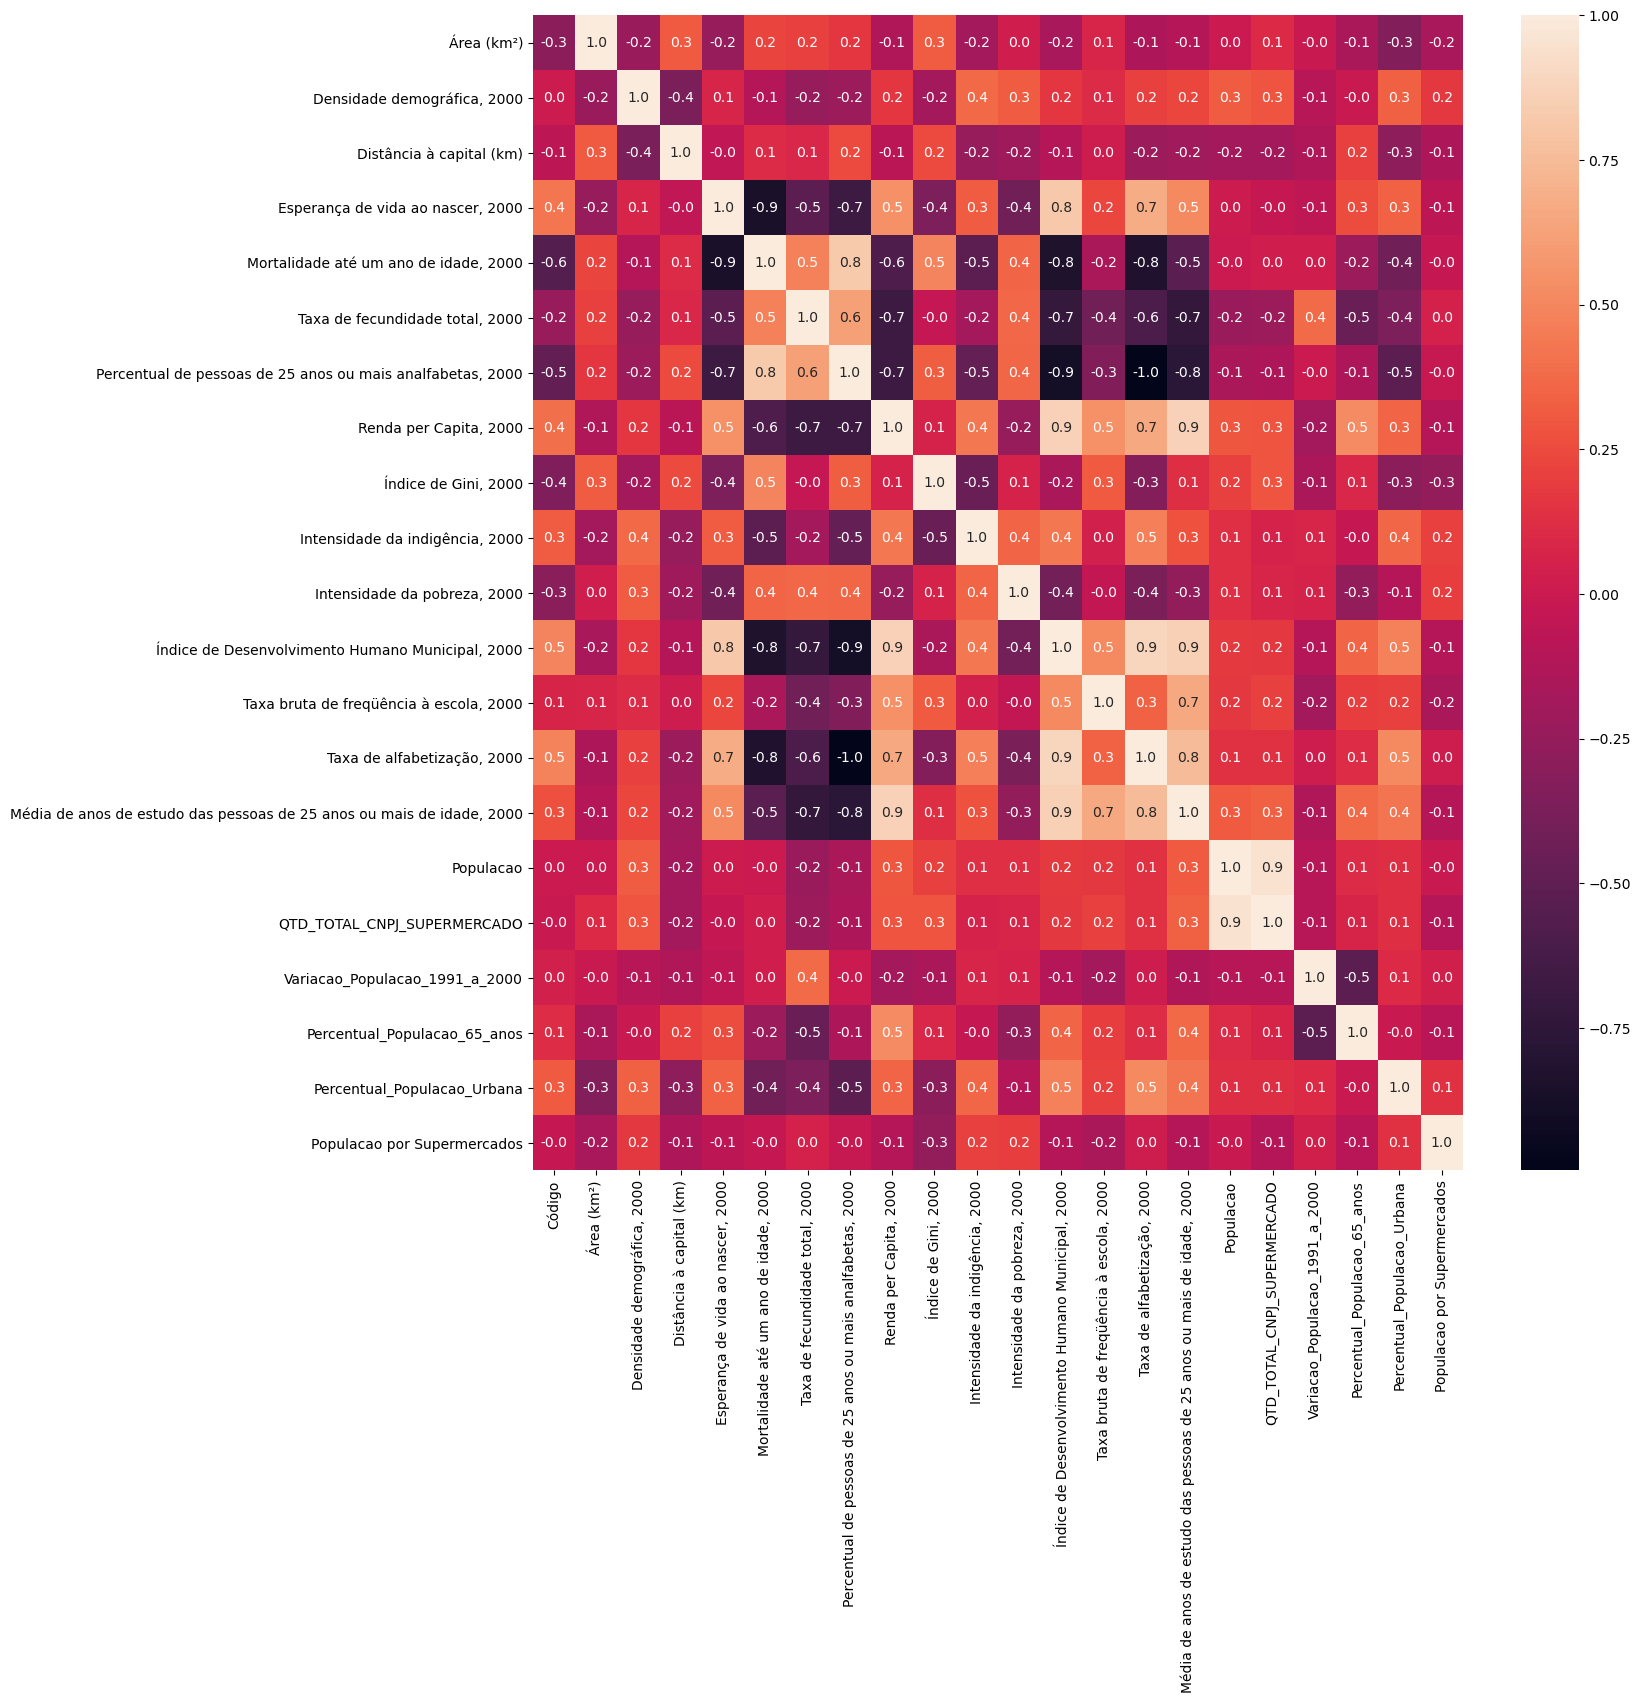

In [15]:
matriz_correlacao = df_municipios.corr().drop('Código')
plt.figure(figsize=(15, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")
plt.show()

Agora podemos verificar quais tem mais correlação e quais não tem, mas ainda está dificil verificar qual a relação entre elas.

Podemos verificar quais são os valores filtrando a matriz de correlação maior que 0.8

In [16]:
matriz_correlacao_v1 = matriz_correlacao.abs()
matriz_correlacao_v1 = matriz_correlacao_v1[matriz_correlacao_v1>0.95]
matriz_correlacao_v1

,Código,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000","Índice de Gini, 2000",...,"Índice de Desenvolvimento Humano Municipal, 2000","Taxa bruta de freqüência à escola, 2000","Taxa de alfabetização, 2000","Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000",Populacao,QTD_TOTAL_CNPJ_SUPERMERCADO,Variacao_Populacao_1991_a_2000,Percentual_Populacao_65_anos,Percentual_Populacao_Urbana,Populacao por Supermercados
Área (km²),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Densidade demográfica, 2000",NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distância à capital (km),NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Esperança de vida ao nascer, 2000",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Mortalidade até um ano de idade, 2000",NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Taxa de fecundidade total, 2000",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Percentual de pessoas de 25 anos ou mais analfabetas, 2000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,0.995864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Renda per Capita, 2000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Índice de Gini, 2000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Intensidade da indigência, 2000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Somando as correlações conseguimos ver que todos aqueles que tem valor superior a 1 tem muita correlação com as demais variaveis.

In [17]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2 = matriz_correlacao_v2[matriz_correlacao_v2>1]
matriz_correlacao_v2

Percentual de pessoas de 25 anos ou mais analfabetas, 2000    1.995864
Taxa de alfabetização, 2000                                   1.995864
dtype: float64

## 5.1. Selecionando as variáveis 
Após verificar as variáveis que são altamente correlacionadas, deve-se determinar quais devem excluídos do dataframe original.
### Esperança de vida ao nascer

In [18]:
for i in range(0, len(matriz_correlacao_v2.index)):
    variavel = matriz_correlacao_v2.index[i]
    valor = matriz_correlacao_v2[i]
    print(f'------{variavel} - {valor}------')
    print(matriz_correlacao_v1[variavel].dropna().sort_values(ascending = False))

------Percentual de pessoas de 25 anos ou mais analfabetas, 2000 - 1.9958635929711948------
Percentual de pessoas de 25 anos ou mais analfabetas, 2000    1.000000
Taxa de alfabetização, 2000                                   0.995864
Name: Percentual de pessoas de 25 anos ou mais analfabetas, 2000, dtype: float64
------Taxa de alfabetização, 2000 - 1.9958635929711948------
Taxa de alfabetização, 2000                                   1.000000
Percentual de pessoas de 25 anos ou mais analfabetas, 2000    0.995864
Name: Taxa de alfabetização, 2000, dtype: float64


Váriaveis para remover:
- Mortalidade até um ano de idade: visto que é correlacionada com maior número de variáveis podemos remove-la.
- Percentual de pessoas de 25 anos ou mais analfabetas, 2000: todas está tem o mesmo comportamento com o Índice de Desenvolvimento Humano Municipal.
- 

In [19]:
df_municipios.drop(columns=['Mortalidade até um ano de idade, 2000', \
                            'Percentual de pessoas de 25 anos ou mais analfabetas, 2000'], inplace = True)
df_municipios.head()

,Código,Município,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Taxa de fecundidade total, 2000","Renda per Capita, 2000","Índice de Gini, 2000","Intensidade da indigência, 2000",...,"Índice de Desenvolvimento Humano Municipal, 2000","Taxa bruta de freqüência à escola, 2000","Taxa de alfabetização, 2000","Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000",Populacao,QTD_TOTAL_CNPJ_SUPERMERCADO,Variacao_Populacao_1991_a_2000,Percentual_Populacao_65_anos,Percentual_Populacao_Urbana,Populacao por Supermercados
3,150010,Abaetetuba (PA),1613.9,73.8,51.184552,70.77,3.15,102.14,0.59,44.61,...,0.706,81.76,80.74,4.28,119152,254.0,0.191651,0.039345,0.594560,469.102362
61,290070,Alagoinhas (BA),736.8,175.9,93.320226,65.34,2.95,181.26,0.60,54.63,...,0.729,90.61,85.71,5.82,130095,287.0,0.112931,0.061563,0.864291,453.292683
137,430060,Alvorada (RS),72.9,2516.1,14.838698,69.98,2.80,214.75,0.45,56.91,...,0.768,77.40,94.01,5.86,183968,636.0,0.295130,0.039371,0.996722,289.257862
155,350160,Americana (SP),133.9,1359.9,114.560278,72.46,1.96,473.23,0.50,77.52,...,0.840,87.15,95.62,6.93,182593,348.0,0.186902,0.069576,0.997623,524.692529
174,150080,Ananindeua (PA),191.4,2053.0,17.749114,72.19,2.35,187.79,0.54,50.21,...,0.782,84.70,94.57,7.01,393569,640.0,0.610071,0.028041,0.997607,614.951563


## 6. Exportando a base Modificada
Exportando a base para o notebook para Elaboração do Modelo de Clusterização

In [20]:
df_municipios.to_csv('../data/processed/base_tratada.csv',
                   sep=";",
                   index=False)